1. adding standdard scaler
2. removing smote from the testing data

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Function

In [5]:
!pip install imbalanced-learn
!pip install ipywidgets


     ------------------------------------ 137.8/137.8 kB 326.1 kB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 2.5 MB/s eta 0:00:00
     ------------------------------------- 384.3/384.3 kB 12.1 MB/s eta 0:00:00


In [9]:
from imblearn.over_sampling import SMOTE
import ipywidgets as widgets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

In [85]:
def ddataset_balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

def Xy_balance(X_temp, y_temp):
  smote = SMOTE()
  return smote.fit_resample(X_temp, y_temp)

def Search_Null(dataset):
  dic={}
  for col in list(dataset.columns):
    rows = []
    flage = 0
    for row in range(dataset.shape[0]):
      if str(dataset[col][row]) == "nan":
        rows.append(row)
        flage = 1
    if flage ==1:
      dic[col] = rows
  
  return dic


def models_check_box(models):
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys


def StandardScaleData(data):
  scaler = StandardScaler()
  scaler.fit(data)
  return  scaler.transform(data)


def MinMaxScaleData(data):
  scaler = MinMaxScaler()
  scaler.fit(data)
  return scaler.transform(data)

#Starting

In [103]:

#dataset=pd.read_csv("/content/drive/MyDrive/Sleep Stage XAI/EEG_HMC_FeatureExtraction_2023.01.19.csv")
#dataset=pd.read_excel("/content/EEG_CNU_Control_Resting, walking, working and Reading_2023.01.07.xlsx")
df = pd.read_csv("EEG_HMC_FeatureExtraction_2023.01.19.csv")
target = "Sleep Stage"
result = {}

In [104]:
df.head(10)

Subject Sleep Stage  Epoch  MeanP_Alpha_F4  MeanP_Beta_F4  MeanP_Theta_F4  \
0   SN002           W      0         0.00051        0.00071         0.00121   
1   SN002           W      1         0.00040        0.00051         0.00062   
2   SN002           W      2         0.00036        0.00047         0.00059   
3   SN002           W      3         0.00035        0.00047         0.00043   
4   SN002           W      4         0.00033        0.00043         0.00053   
5   SN002           W      5         0.00036        0.00043         0.00038   
6   SN002          N1      6         0.00034        0.00047         0.00041   
7   SN002          N1      7         0.00035        0.00048         0.00040   
8   SN002          N1      8         0.00035        0.00042         0.00052   
9   SN002          N2      9         0.00050        0.00053         0.00077   

   MeanP_Delta_F4  MeanP_Gamma_F4  MeanP_Alpha_C4  MeanP_Beta_C4  ...  DAR_C4  \
0         0.01070        0.000240         0.00041        0.00067  ...    8.61   
1         0.00539        0.000120         0.00038        0.00052  ...    6.26   
2         0.00967        0.000100         0.00036        0.00049  ...    8.67   
3         0.00228        0.000110         0.00036        0.00053  ...    4.00   
4         0.00436        0.000094         0.00031        0.00043  ...    4.81   
5         0.00194        0.000085         0.00039        0.00048  ...    2.56   
6         0.00159        0.000100         0.00038        0.00054  ...    3.63   
7         0.00128        0.000094         0.00041        0.00064  ...    3.27   
8         0.00134        0.000094         0.00043        0.00047  ...    3.63   
9         0.00290        0.000087         0.00067        0.00073  ...    8.19   

   DAR_O2  DAR_G  DTR_F4  DTR_O2  DTABR_F4  DTABR_C4  DTABR_O2  DTABR_G  \
0   25.00  18.20    8.85   18.60      9.77      3.83      8.67     7.42   
1   30.10  16.60    8.69   28.90      6.60      3.16     12.30     7.34   
2   10.50  15.30   16.40    9.58     12.40      4.19      4.62     7.06   
3    3.64   4.72    5.30    3.64      3.30      2.07      1.90     2.42   
4    7.61   8.54    8.23    7.29      6.43      2.53      3.49     4.15   
5    2.44   3.47    5.11    2.64      2.94      1.62      1.52     2.02   
6    4.87   4.39    3.88    4.48      2.47      2.02      2.40     2.30   
7    3.04   3.32    3.20    2.59      2.02      1.76      1.76     1.85   
8    3.08   3.51    2.58    2.14      2.42      2.60      2.02     2.34   
9    4.81   6.27    3.77    2.77      3.56      4.91      2.95     3.81   

       P_G  
0  0.00918  
1  0.00636  
2  0.00628  
3  0.00278  
4  0.00369  
5  0.00238  
6  0.00260  
7  0.00240  
8  0.00260  
9  0.00520  

[10 rows x 52 columns]

In [105]:
df.shape

(108920, 52)

###Removing Null Values

In [106]:
df.dropna(axis = 0,how='any', inplace = True)

In [107]:
df.to_csv("New_EEG_NullValueRemoved_HMC.csv")
dataset = pd.read_csv("New_EEG_NullValueRemoved_HMC.csv")
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
target = "Sleep Stage"
result = {}

In [108]:
Search_Null(dataset)

{}

In [88]:
dataset.head()

Subject Sleep Stage  Epoch  MeanP_Alpha_F4  MeanP_Beta_F4  MeanP_Theta_F4  \
0   SN002           W      0         0.00051        0.00071         0.00121   
1   SN002           W      1         0.00040        0.00051         0.00062   
2   SN002           W      2         0.00036        0.00047         0.00059   
3   SN002           W      3         0.00035        0.00047         0.00043   
4   SN002           W      4         0.00033        0.00043         0.00053   

   MeanP_Delta_F4  MeanP_Gamma_F4  MeanP_Alpha_C4  MeanP_Beta_C4  ...  DAR_C4  \
0         0.01070        0.000240         0.00041        0.00067  ...    8.61   
1         0.00539        0.000120         0.00038        0.00052  ...    6.26   
2         0.00967        0.000100         0.00036        0.00049  ...    8.67   
3         0.00228        0.000110         0.00036        0.00053  ...    4.00   
4         0.00436        0.000094         0.00031        0.00043  ...    4.81   

   DAR_O2  DAR_G  DTR_F4  DTR_O2  DTABR_F4  DTABR_C4  DTABR_O2  DTABR_G  \
0   25.00  18.20    8.85   18.60      9.77      3.83      8.67     7.42   
1   30.10  16.60    8.69   28.90      6.60      3.16     12.30     7.34   
2   10.50  15.30   16.40    9.58     12.40      4.19      4.62     7.06   
3    3.64   4.72    5.30    3.64      3.30      2.07      1.90     2.42   
4    7.61   8.54    8.23    7.29      6.43      2.53      3.49     4.15   

       P_G  
0  0.00918  
1  0.00636  
2  0.00628  
3  0.00278  
4  0.00369  

[5 rows x 52 columns]

In [89]:
dataset[target].value_counts()

N2    39428
N3    21290
W     19354
R     16465
N1    11913
Name: Sleep Stage, dtype: int64

###Enocoding

In [90]:
set(list(dataset[target]))

{'N1', 'N2', 'N3', 'R', 'W'}

In [91]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [92]:
set(list(dataset[target]))

{0, 1, 2, 3, 4}

###Spliting into X and y

In [93]:
X =  dataset.loc[:,dataset.columns != target]  # removing Sleep Stage
X =  X.loc[:,X.columns != "Subject"]            # removing Status
X =  X.loc[:,X.columns != "Epoch"]             # removing Epoch
y = dataset[target]

X.head(10)

MeanP_Alpha_F4  MeanP_Beta_F4  MeanP_Theta_F4  MeanP_Delta_F4  \
0         0.00051        0.00071         0.00121         0.01070   
1         0.00040        0.00051         0.00062         0.00539   
2         0.00036        0.00047         0.00059         0.00967   
3         0.00035        0.00047         0.00043         0.00228   
4         0.00033        0.00043         0.00053         0.00436   
5         0.00036        0.00043         0.00038         0.00194   
6         0.00034        0.00047         0.00041         0.00159   
7         0.00035        0.00048         0.00040         0.00128   
8         0.00035        0.00042         0.00052         0.00134   
9         0.00050        0.00053         0.00077         0.00290   

   MeanP_Gamma_F4  MeanP_Alpha_C4  MeanP_Beta_C4  MeanP_Theta_C4  \
0        0.000240         0.00041        0.00067         0.00061   
1        0.000120         0.00038        0.00052         0.00046   
2        0.000100         0.00036        0.00049         0.00044   
3        0.000110         0.00036        0.00053         0.00040   
4        0.000094         0.00031        0.00043         0.00038   
5        0.000085         0.00039        0.00048         0.00041   
6        0.000100         0.00038        0.00054         0.00048   
7        0.000094         0.00041        0.00064         0.00051   
8        0.000094         0.00043        0.00047         0.00078   
9        0.000087         0.00067        0.00073         0.00139   

   MeanP_Delta_C4  MeanP_Gamma_C4  ...  DAR_C4  DAR_O2  DAR_G  DTR_F4  DTR_O2  \
0         0.00353        0.000210  ...    8.61   25.00  18.20    8.85   18.60   
1         0.00238        0.000100  ...    6.26   30.10  16.60    8.69   28.90   
2         0.00312        0.000087  ...    8.67   10.50  15.30   16.40    9.58   
3         0.00144        0.000110  ...    4.00    3.64   4.72    5.30    3.64   
4         0.00149        0.000081  ...    4.81    7.61   8.54    8.23    7.29   
5         0.00100        0.000081  ...    2.56    2.44   3.47    5.11    2.64   
6         0.00138        0.000100  ...    3.63    4.87   4.39    3.88    4.48   
7         0.00134        0.000110  ...    3.27    3.04   3.32    3.20    2.59   
8         0.00156        0.000087  ...    3.63    3.08   3.51    2.58    2.14   
9         0.00549        0.000095  ...    8.19    4.81   6.27    3.77    2.77   

   DTABR_F4  DTABR_C4  DTABR_O2  DTABR_G      P_G  
0      9.77      3.83      8.67     7.42  0.00918  
1      6.60      3.16     12.30     7.34  0.00636  
2     12.40      4.19      4.62     7.06  0.00628  
3      3.30      2.07      1.90     2.42  0.00278  
4      6.43      2.53      3.49     4.15  0.00369  
5      2.94      1.62      1.52     2.02  0.00238  
6      2.47      2.02      2.40     2.30  0.00260  
7      2.02      1.76      1.76     1.85  0.00240  
8      2.42      2.60      2.02     2.34  0.00260  
9      3.56      4.91      2.95     3.81  0.00520  

[10 rows x 49 columns]

###USing SMOTE for balancing

In [69]:
new_dataset =  balance(X,y)

In [70]:
new_dataset[target].value_counts()

4    39428
0    39428
1    39428
2    39428
3    39428
Name: Sleep Stage, dtype: int64

#Feature Selection

In [ ]:
number_of_feat = 30

###ANOVA with f classifciation

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA'] 

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])

###Embedded Method

In [ ]:
''''
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

list_of_feat=[]


for i in range(coef.shape[0]):
  if coef[i]!=0:
    list_of_feat.append(dataset.iloc[:0,i+3].name)
    
df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Embedded_Method.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]
'''

###Pearson's with f regression

In [ ]:
'''
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd


fs = SelectKBest(score_func=f_regression, k=5)
fit = fs.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_pearsons'] 


lyst = featureScores.nlargest(number_of_feat,'Score_pearsons')

#lyst.to_csv('Filter_Method_Pearson’s_with_f_regression.csv')

list_of_feat = list(lyst["Best_columns"])
'''

###Sequential Feature Selection

In [ ]:
''''
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X, y)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(X.columns))

df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Filter_Method_Sequential_feat_Selection_KNN.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]
  '''

###Feature list

In [ ]:
dfcolumns = pd.DataFrame(list_of_feat)
print(dfcolumns)

#Data Spliting Into X,y

In [94]:
#X_new = new_dataset[list_of_feat]
#y_new = new_dataset[target]

#X_new =  new_dataset.loc[:,new_dataset.columns != target] 
#y_new = new_dataset[target]

X_new = X
y_new = y

#X_new.head(10)
print(X_new.shape)

(108450, 49)


#Data Scaling

In [96]:
X_new =  StandardScaleData(X_new)
print(X_new.shape)
X_new

(108450, 49)


array([[-0.0653349 , -0.06741043, -0.04805037, ..., -0.11649183,
        -0.11649183, -0.12025476],
       [-0.07426116, -0.09237015, -0.06824147, ..., -0.11649183,
        -0.11649183, -0.13409893],
       [-0.07750708, -0.0973621 , -0.06926814, ..., -0.11649183,
        -0.11649183, -0.13449167],
       ...,
       [-0.07426116, -0.10984196, -0.07269036, ..., -0.11649183,
        -0.11649183, -0.15363786],
       [-0.0653349 , -0.06241848, -0.06892592, ..., -0.11649183,
        -0.11649183, -0.13620992],
       [-0.00285108,  0.22337036, -0.02272594, ..., -0.11649183,
        -0.11649183, -0.03915347]])

#Data Spliting Into Train and Testing

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

###Only Training Balancing

In [98]:
X_train,y_train = Xy_balance(X_train,y_train)




---



# **Training**



---



#ADABOOST

In [99]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[ 554  312  147  627  745]
 [ 731 2478 2521 1493  647]
 [  46  397 3580  135   61]
 [ 553  403  271 1925  248]
 [ 414  168   76  202 2956]]
              precision    recall  f1-score   support

           0       0.24      0.23      0.24      2385
           1       0.66      0.31      0.43      7870
           2       0.54      0.85      0.66      4219
           3       0.44      0.57      0.49      3400
           4       0.63      0.77      0.70      3816

    accuracy                           0.53     21690
   macro avg       0.50      0.55      0.50     21690
weighted avg       0.55      0.53      0.51     21690

Accurecy:  0.5298755186721992


1/50 round completed......................... Accurecy: 0.33597950694937606
2/50 round completed......................... Accurecy: 0.36740387541848435
3/50 round completed......................... Accurecy: 0.4419448107943593
4/50 round completed......................... Accurecy: 0.4432129451151466
5/50 round completed......................... Accurecy: 0.4448361570457543
6/50 round completed......................... Accurecy: 0.463376280815664
7/50 round completed......................... Accurecy: 0.46362990767982143
8/50 round completed......................... Accurecy: 0.4695647763011058
9/50 round completed......................... Accurecy: 0.481586689662169
10/50 round completed......................... Accurecy: 0.4779344628183017
11/50 round completed......................... Accurecy: 0.48734401947854317
12/50 round completed......................... Accurecy: 0.49611950897839097
13/50 round completed......................... Accurecy: 0.4911991478137364
14/50 round comple

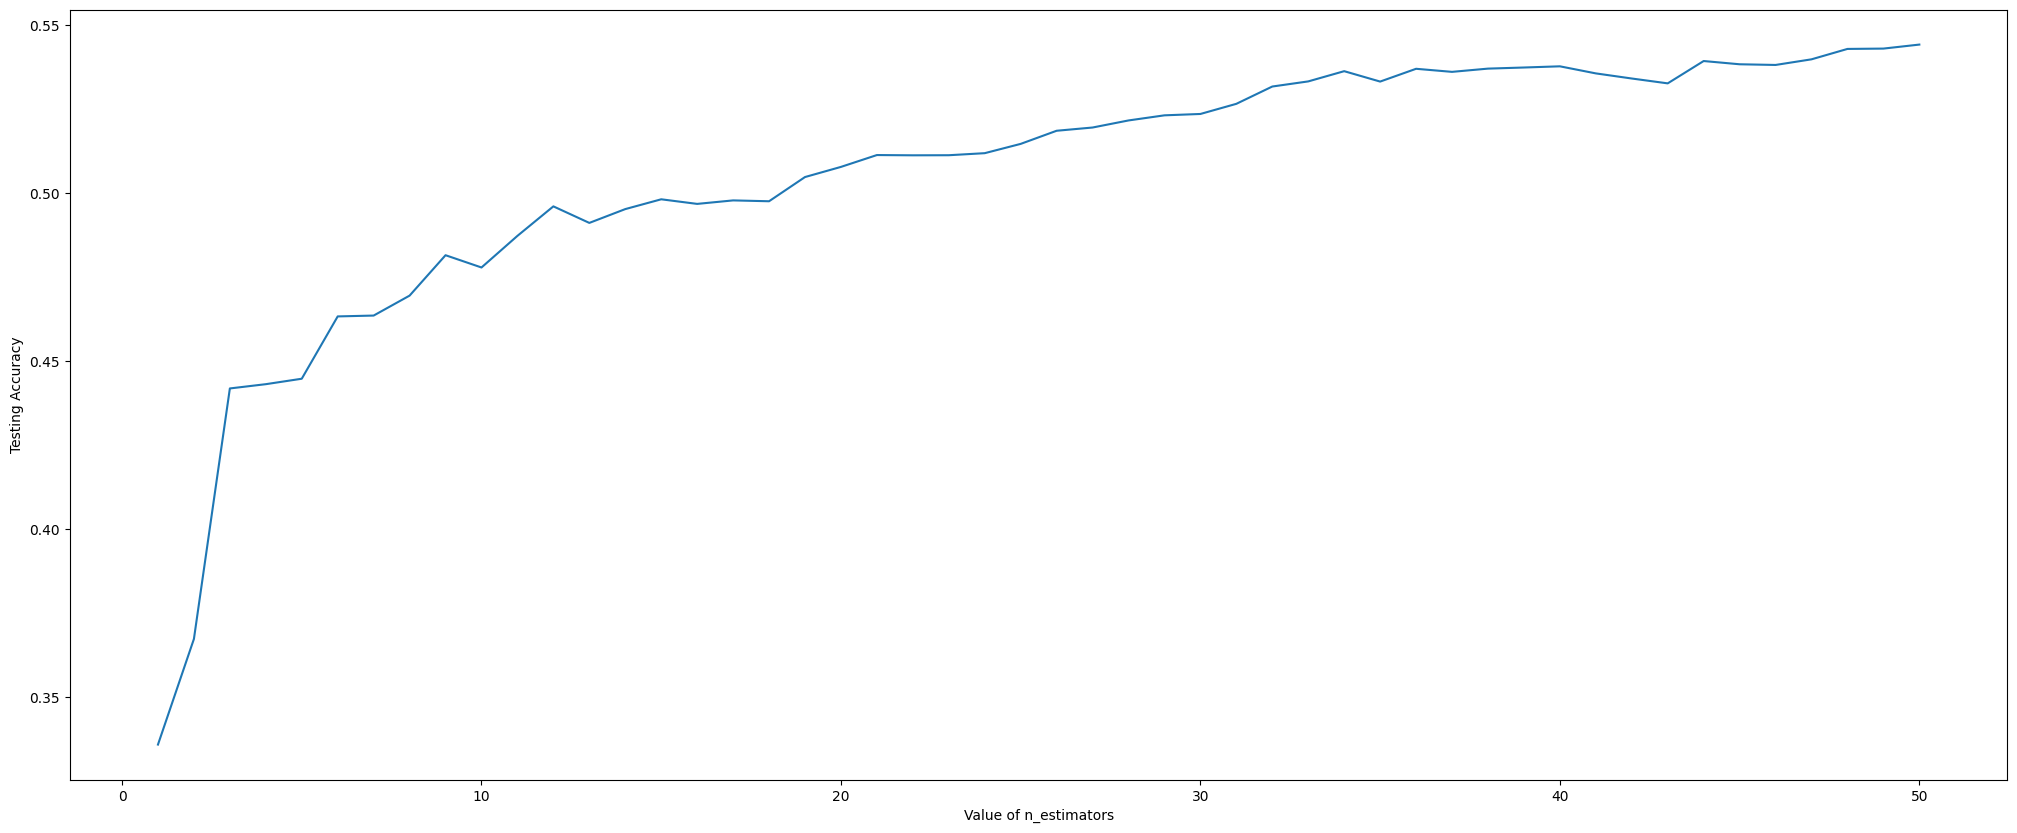

In [24]:
from sklearn.ensemble import AdaBoostClassifier
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[78 52 26  7]
 [30 89 19  7]
 [36 32 80 20]
 [11 10 41 97]]
              precision    recall  f1-score   support

           0       0.50      0.48      0.49       163
           1       0.49      0.61      0.54       145
           2       0.48      0.48      0.48       168
           3       0.74      0.61      0.67       159

    accuracy                           0.54       635
   macro avg       0.55      0.54      0.55       635
weighted avg       0.55      0.54      0.54       635

Accurecy:  0.5417322834645669




---



---



#Graddient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[109  20  28   6]
 [ 22 111   6   6]
 [ 26  17 110  15]
 [ 10  11  18 120]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       163
           1       0.70      0.77      0.73       145
           2       0.68      0.65      0.67       168
           3       0.82      0.75      0.78       159

    accuracy                           0.71       635
   macro avg       0.71      0.71      0.71       635
weighted avg       0.71      0.71      0.71       635

Accurecy:  0.7086614173228346


1/50 round completed......................... Accurecy: 0.510236220472441
2/50 round completed......................... Accurecy: 0.5181102362204725
3/50 round completed......................... Accurecy: 0.537007874015748
4/50 round completed......................... Accurecy: 0.5653543307086614
5/50 round completed......................... Accurecy: 0.5511811023622047
6/50 round completed......................... Accurecy: 0.573228346456693
7/50 round completed......................... Accurecy: 0.5858267716535434
8/50 round completed......................... Accurecy: 0.5984251968503937
9/50 round completed......................... Accurecy: 0.6
10/50 round completed......................... Accurecy: 0.6110236220472441
11/50 round completed......................... Accurecy: 0.6125984251968504
12/50 round completed......................... Accurecy: 0.6110236220472441
13/50 round completed......................... Accurecy: 0.6141732283464567
14/50 round completed..................

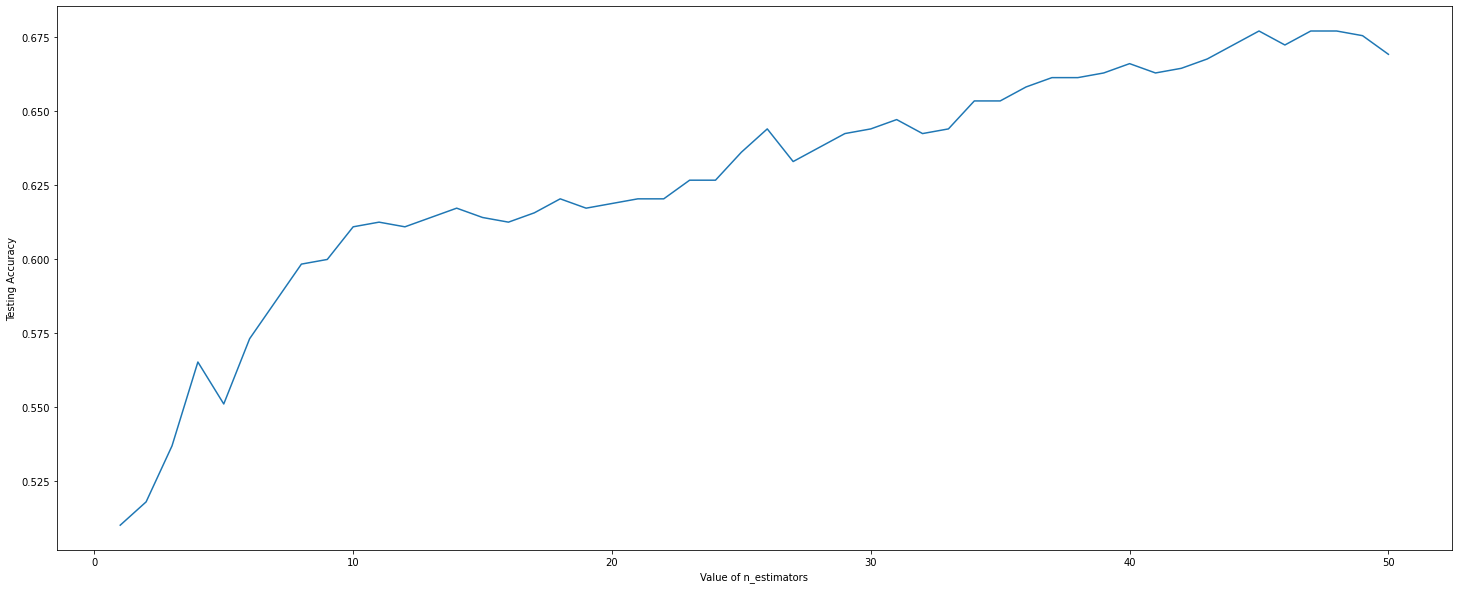

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/14 round completed......................... Accurecy: 0.5748031496062992
2/14 round completed......................... Accurecy: 0.6803149606299213
3/14 round completed......................... Accurecy: 0.7086614173228346
4/14 round completed......................... Accurecy: 0.7338582677165354
5/14 round completed......................... Accurecy: 0.7763779527559055
6/14 round completed......................... Accurecy: 0.7905511811023622
7/14 round completed......................... Accurecy: 0.7779527559055118
8/14 round completed......................... Accurecy: 0.7905511811023622
9/14 round completed......................... Accurecy: 0.7952755905511811
10/14 round completed......................... Accurecy: 0.7826771653543307
11/14 round completed......................... Accurecy: 0.7732283464566929
12/14 round completed......................... Accurecy: 0.7811023622047244
13/14 round completed......................... Accurecy: 0.768503937007874
14/14 round completed.

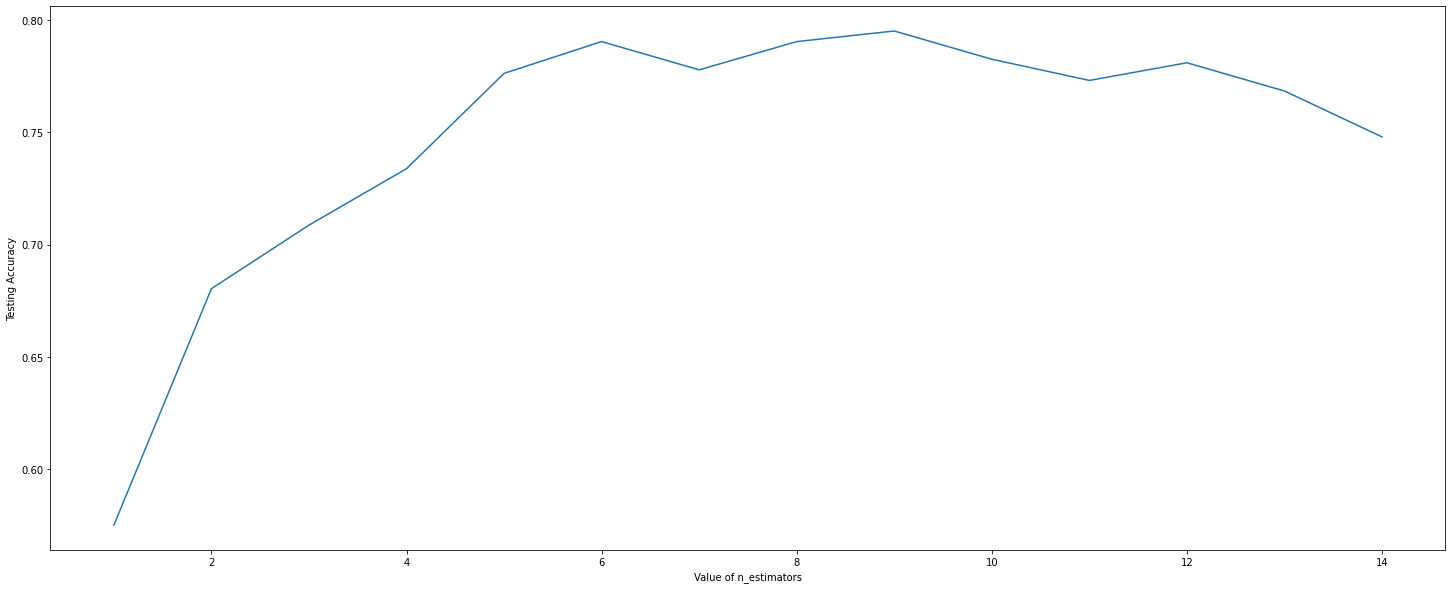

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=14
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[110  20  24   9]
 [ 27 102   9   7]
 [ 32  20 103  13]
 [ 12   6  26 115]]
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       163
           1       0.69      0.70      0.70       145
           2       0.64      0.61      0.62       168
           3       0.80      0.72      0.76       159

    accuracy                           0.68       635
   macro avg       0.68      0.68      0.68       635
weighted avg       0.68      0.68      0.68       635

Accurecy:  0.6771653543307087


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[123  12  22   6]
 [ 21 117   6   1]
 [ 23   9 125  11]
 [ 10   2   7 140]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       163
           1       0.84      0.81      0.82       145
           2       0.78      0.74      0.76       168
           3       0.89      0.88      0.88       159

    accuracy                           0.80       635
   macro avg       0.80      0.80      0.80       635
weighted avg       0.80      0.80      0.80       635

Accurecy:  0.7952755905511811


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[117  18  19   9]
 [ 20 117   7   1]
 [ 24  12 123   9]
 [ 10   1  11 137]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       163
           1       0.79      0.81      0.80       145
           2       0.77      0.73      0.75       168
           3       0.88      0.86      0.87       159

    accuracy                           0.78       635
   macro avg       0.78      0.78      0.78       635
weighted avg       0.78      0.78      0.78       635

Accurecy:  0.7779527559055118




---



---



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[120  17  18   8]
 [ 21 117   5   2]
 [ 24   9 125  10]
 [  6   4   9 140]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       163
           1       0.80      0.81      0.80       145
           2       0.80      0.74      0.77       168
           3       0.88      0.88      0.88       159

    accuracy                           0.79       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7905511811023622


1/150 round completed......................... Accurecy: 0.5968503937007874
2/150 round completed......................... Accurecy: 0.5937007874015748
3/150 round completed......................... Accurecy: 0.6519685039370079
4/150 round completed......................... Accurecy: 0.6740157480314961
5/150 round completed......................... Accurecy: 0.6929133858267716
6/150 round completed......................... Accurecy: 0.721259842519685
7/150 round completed......................... Accurecy: 0.7259842519685039
8/150 round completed......................... Accurecy: 0.7196850393700788
9/150 round completed......................... Accurecy: 0.7338582677165354
10/150 round completed......................... Accurecy: 0.7354330708661417
11/150 round completed......................... Accurecy: 0.7480314960629921
12/150 round completed......................... Accurecy: 0.752755905511811
13/150 round completed......................... Accurecy: 0.7448818897637796
14/150 rou

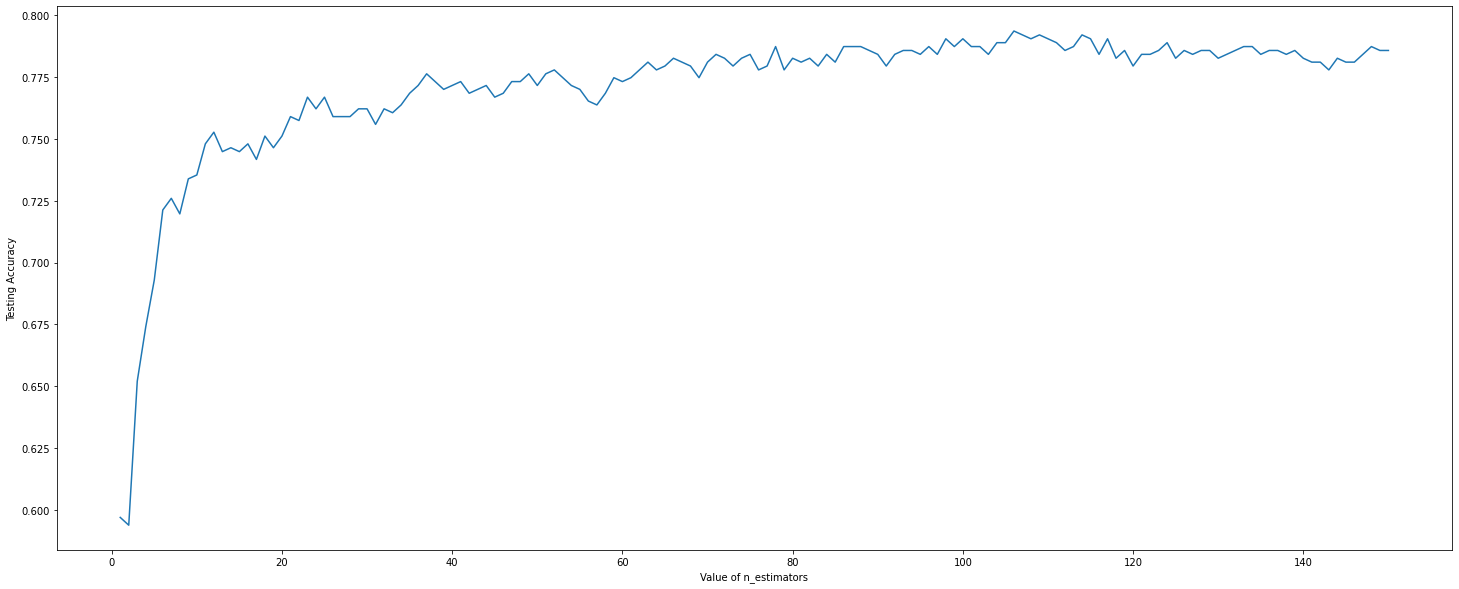

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.3937007874015748
2/30 round completed......................... Accurecy: 0.5055118110236221
3/30 round completed......................... Accurecy: 0.5196850393700787
4/30 round completed......................... Accurecy: 0.5622047244094488
5/30 round completed......................... Accurecy: 0.6
6/30 round completed......................... Accurecy: 0.6299212598425197
7/30 round completed......................... Accurecy: 0.6724409448818898
8/30 round completed......................... Accurecy: 0.7118110236220473
9/30 round completed......................... Accurecy: 0.7244094488188977
10/30 round completed......................... Accurecy: 0.7480314960629921
11/30 round completed......................... Accurecy: 0.7637795275590551
12/30 round completed......................... Accurecy: 0.7622047244094489
13/30 round completed......................... Accurecy: 0.7748031496062993
14/30 round completed...............

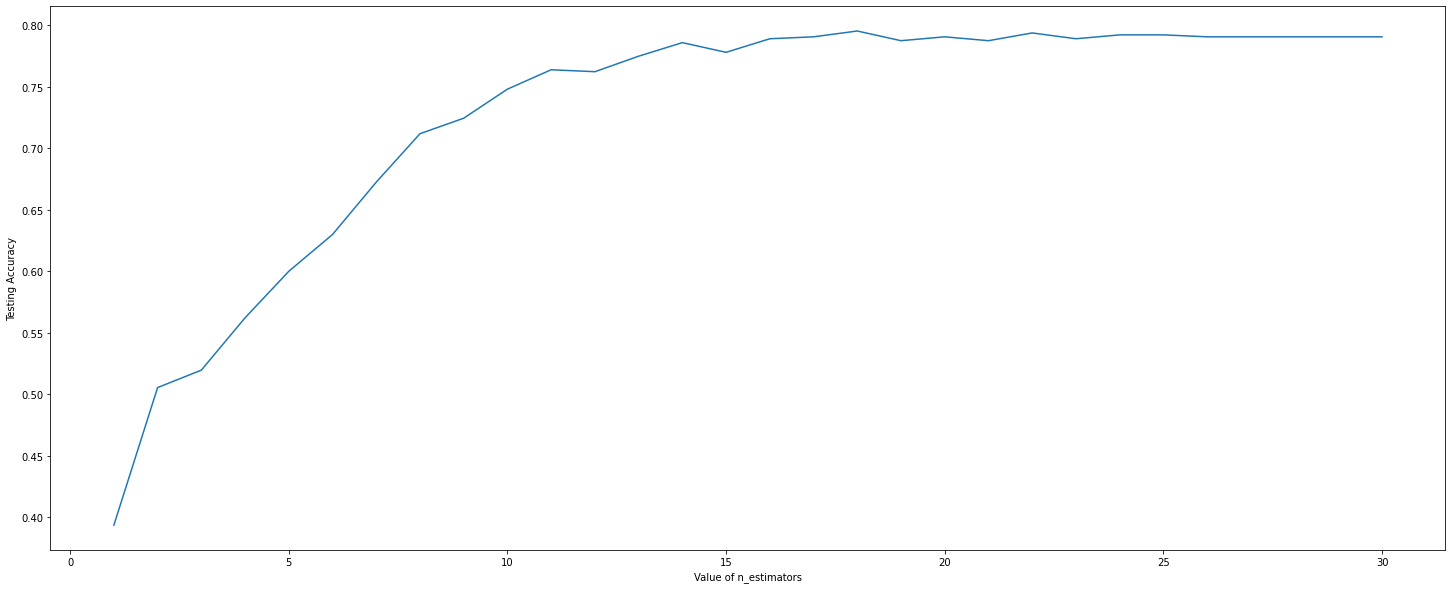

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[118  20  17   8]
 [ 17 121   5   2]
 [ 24   9 125  10]
 [  6   4   9 140]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       163
           1       0.79      0.83      0.81       145
           2       0.80      0.74      0.77       168
           3       0.88      0.88      0.88       159

    accuracy                           0.79       635
   macro avg       0.79      0.80      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7937007874015748


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[118  19  18   8]
 [ 16 122   5   2]
 [ 23  11 124  10]
 [  5   5   8 141]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       163
           1       0.78      0.84      0.81       145
           2       0.80      0.74      0.77       168
           3       0.88      0.89      0.88       159

    accuracy                           0.80       635
   macro avg       0.80      0.80      0.80       635
weighted avg       0.80      0.80      0.79       635

Accurecy:  0.7952755905511811


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[120  17  18   8]
 [ 15 123   5   2]
 [ 23  11 124  10]
 [  5   5   8 141]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       163
           1       0.79      0.85      0.82       145
           2       0.80      0.74      0.77       168
           3       0.88      0.89      0.88       159

    accuracy                           0.80       635
   macro avg       0.80      0.80      0.80       635
weighted avg       0.80      0.80      0.80       635

Accurecy:  0.8




---



---



#XGB

In [ ]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train.values,y_train.values)
y_pred = xgb_deafult.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[113  20  21   9]
 [ 26 104   9   6]
 [ 32  20  99  17]
 [ 10   5  24 120]]
              precision    recall  f1-score   support

           0       0.62      0.69      0.66       163
           1       0.70      0.72      0.71       145
           2       0.65      0.59      0.62       168
           3       0.79      0.75      0.77       159

    accuracy                           0.69       635
   macro avg       0.69      0.69      0.69       635
weighted avg       0.69      0.69      0.69       635

Accurecy:  0.6866141732283465


1/250 round completed......................... Accurecy: 0.48976377952755906
2/250 round completed......................... Accurecy: 0.5275590551181102
3/250 round completed......................... Accurecy: 0.5433070866141733
4/250 round completed......................... Accurecy: 0.5448818897637795
5/250 round completed......................... Accurecy: 0.5417322834645669
6/250 round completed......................... Accurecy: 0.5543307086614173
7/250 round completed......................... Accurecy: 0.5622047244094488
8/250 round completed......................... Accurecy: 0.5748031496062992
9/250 round completed......................... Accurecy: 0.5748031496062992
10/250 round completed......................... Accurecy: 0.5858267716535434
11/250 round completed......................... Accurecy: 0.5905511811023622
12/250 round completed......................... Accurecy: 0.6015748031496063
13/250 round completed......................... Accurecy: 0.6110236220472441
14/250 

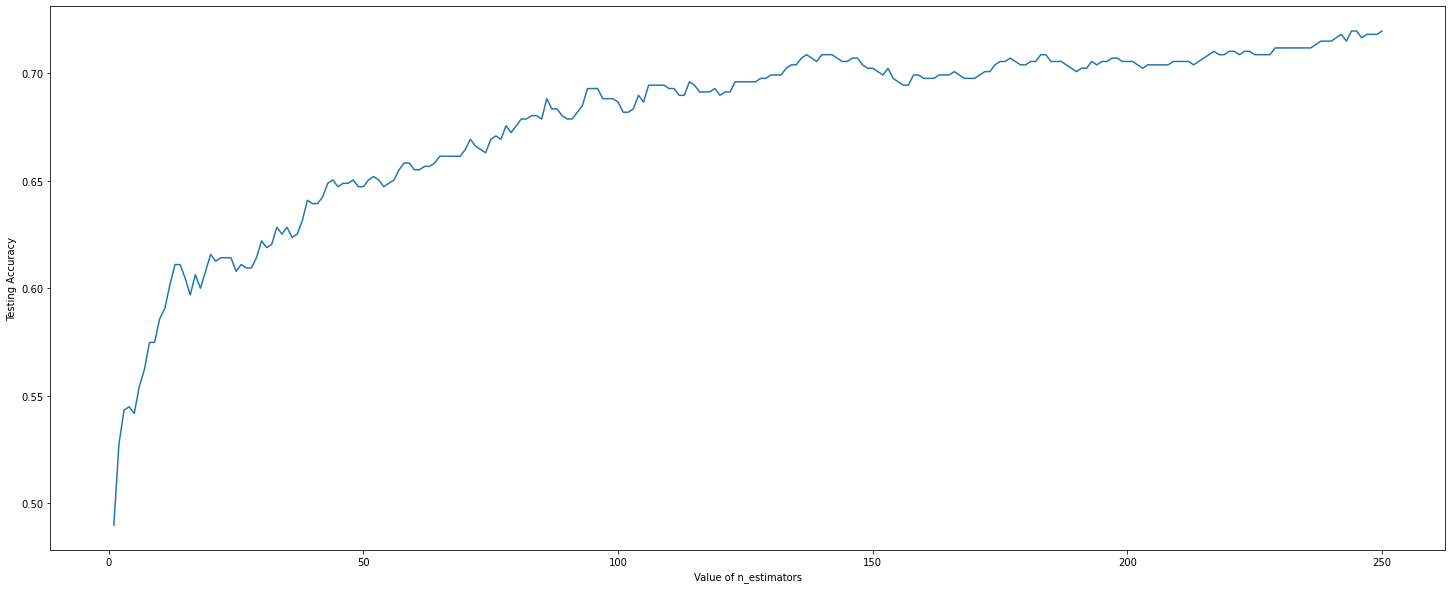

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.5543307086614173
2/30 round completed......................... Accurecy: 0.6425196850393701
3/30 round completed......................... Accurecy: 0.6866141732283465
4/30 round completed......................... Accurecy: 0.7228346456692913
5/30 round completed......................... Accurecy: 0.752755905511811
6/30 round completed......................... Accurecy: 0.7653543307086614
7/30 round completed......................... Accurecy: 0.7795275590551181
8/30 round completed......................... Accurecy: 0.7858267716535433
9/30 round completed......................... Accurecy: 0.7826771653543307
10/30 round completed......................... Accurecy: 0.7779527559055118
11/30 round completed......................... Accurecy: 0.7874015748031497
12/30 round completed......................... Accurecy: 0.7748031496062993
13/30 round completed......................... Accurecy: 0.7763779527559055
14/30 round completed.

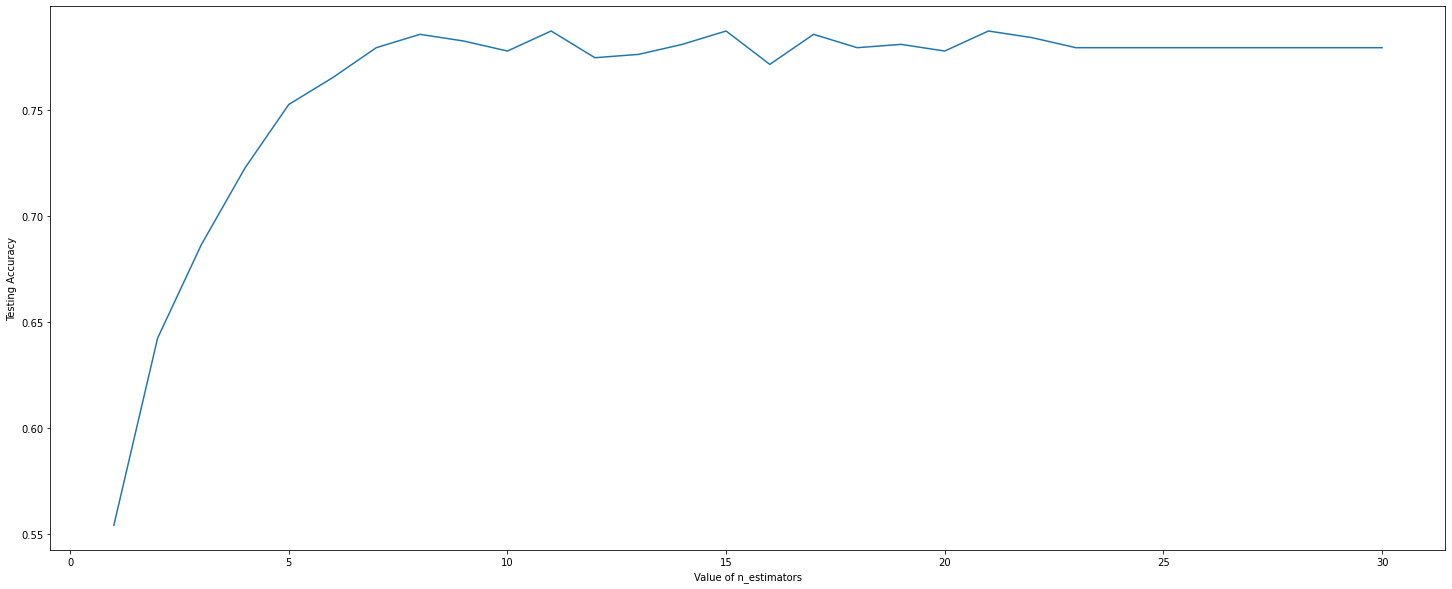

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[116  19  20   8]
 [ 13 122   4   6]
 [ 26  11 122   9]
 [ 11   2   6 140]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       163
           1       0.79      0.84      0.82       145
           2       0.80      0.73      0.76       168
           3       0.86      0.88      0.87       159

    accuracy                           0.79       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7874015748031497
XGBClassifier(max_depth=11, objective='multi:softprob')


In [ ]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train.values,y_train.values)
y_pred = xgb_estimator.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[113  23  21   6]
 [ 23 104  11   7]
 [ 26  14 114  14]
 [  7   8  18 126]]
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       163
           1       0.70      0.72      0.71       145
           2       0.70      0.68      0.69       168
           3       0.82      0.79      0.81       159

    accuracy                           0.72       635
   macro avg       0.72      0.72      0.72       635
weighted avg       0.72      0.72      0.72       635

Accurecy:  0.7196850393700788
XGBClassifier(n_estimators=244, objective='multi:softprob')


In [ ]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train.values,y_train.values)
y_pred = xgb_all.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[119  19  21   4]
 [ 13 122   6   4]
 [ 24  10 125   9]
 [  7   2   8 142]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       163
           1       0.80      0.84      0.82       145
           2       0.78      0.74      0.76       168
           3       0.89      0.89      0.89       159

    accuracy                           0.80       635
   macro avg       0.80      0.80      0.80       635
weighted avg       0.80      0.80      0.80       635

Accurecy:  0.8


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 90  34  17  22]
 [ 22 110   3  10]
 [ 29  20 104  15]
 [ 15   7  25 112]]
              precision    recall  f1-score   support

           0       0.58      0.55      0.56       163
           1       0.64      0.76      0.70       145
           2       0.70      0.62      0.66       168
           3       0.70      0.70      0.70       159

    accuracy                           0.66       635
   macro avg       0.66      0.66      0.66       635
weighted avg       0.66      0.66      0.65       635

Accurecy:  0.6551181102362205


1/105 round completed......................... Accurecy: 0.7795275590551181
2/105 round completed......................... Accurecy: 0.7181102362204724
3/105 round completed......................... Accurecy: 0.6787401574803149
4/105 round completed......................... Accurecy: 0.6677165354330709
5/105 round completed......................... Accurecy: 0.6551181102362205
6/105 round completed......................... Accurecy: 0.631496062992126
7/105 round completed......................... Accurecy: 0.6204724409448819
8/105 round completed......................... Accurecy: 0.6157480314960629
9/105 round completed......................... Accurecy: 0.6015748031496063
10/105 round completed......................... Accurecy: 0.5968503937007874
11/105 round completed......................... Accurecy: 0.6094488188976378
12/105 round completed......................... Accurecy: 0.5937007874015748
13/105 round completed......................... Accurecy: 0.584251968503937
14/105 rou

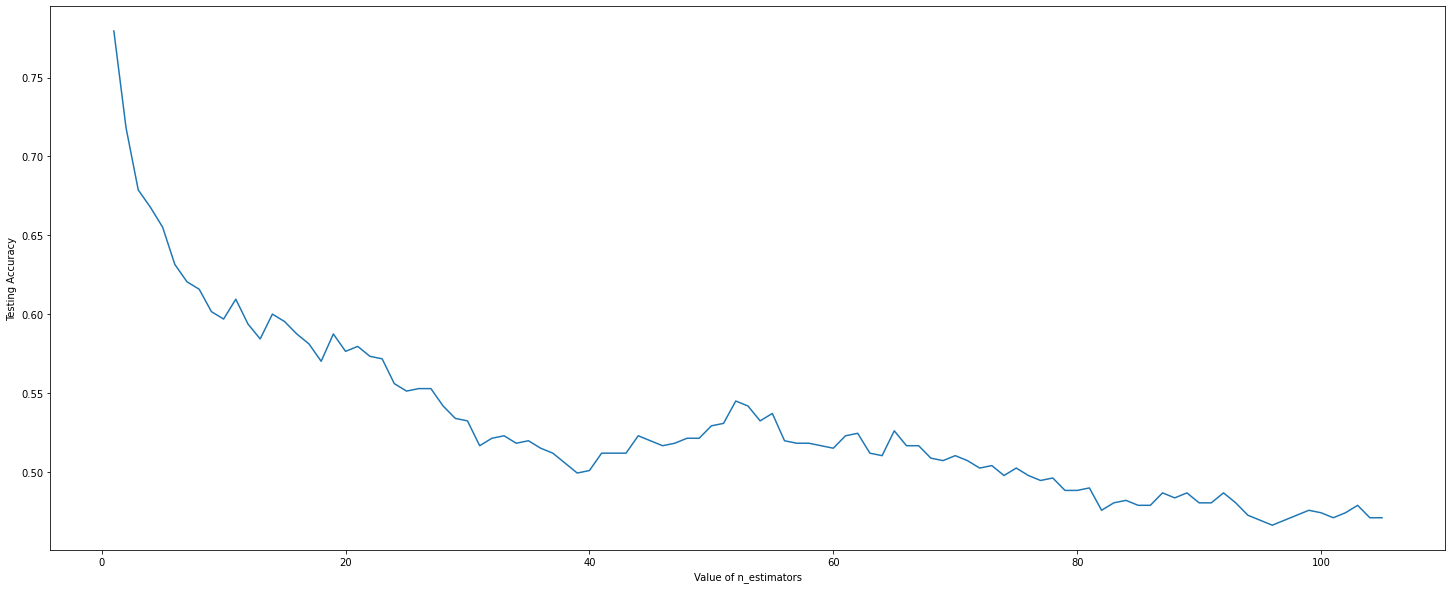

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 91  28  25  19]
 [ 12 129   3   1]
 [ 17  10 133   8]
 [  8   2   7 142]]
              precision    recall  f1-score   support

           0       0.71      0.56      0.63       163
           1       0.76      0.89      0.82       145
           2       0.79      0.79      0.79       168
           3       0.84      0.89      0.86       159

    accuracy                           0.78       635
   macro avg       0.78      0.78      0.78       635
weighted avg       0.78      0.78      0.77       635

Accurecy:  0.7795275590551181


#NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[80 22 23 38]
 [43 53 26 23]
 [22 40 85 21]
 [19 13 46 81]]
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       163
           1       0.41      0.37      0.39       145
           2       0.47      0.51      0.49       168
           3       0.50      0.51      0.50       159

    accuracy                           0.47       635
   macro avg       0.47      0.47      0.47       635
weighted avg       0.47      0.47      0.47       635

Accurecy:  0.47086614173228347




---



---



#Result

In [ ]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


AdaBoostClassifier(random_state=0) 1  :  0.5055118110236221
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=42, random_state=0) 1  :  0.5417322834645669
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.7086614173228346
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=45, random_state=0) 2  :  0.6771653543307087
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=9, random_state=0) 2  :  0.7952755905511811
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=9, n_estimators=45, random_state=0) 2  :  0.7779527559055118
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.7905511811023622
---------------------------------------------------------------

RandomForest

In [ ]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(RandomForestClassifier(max_depth=18, n_estimators=106, random_state=0), 3, 'RandomForestClassifier')   :  0.8
-------------------------------------------------------------------------------------------------
(XGBClassifier(max_depth=11, n_estimators=244, objective='multi:softprob'), 4, 'xgboost')   :  0.8
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_depth=9, random_state=0), 2, 'GradientBoostingClassifier')   :  0.7952755905511811
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(max_depth=18, random_state=0), 3, 'RandomForestClassifier')   :  0.7952755905511811
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(n_estimators=106, random_state=0), 3, 'RandomForestClassifier')   :  0.7937007874015748
---------------------------------------------------------------

In [ ]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(RandomForestClassifier(max_depth=18, n_estimators=106, random_state=0), 'RandomForestClassifier')
(XGBClassifier(max_depth=11, n_estimators=244, objective='multi:softprob'), 'xgboost')
(GradientBoostingClassifier(max_depth=9, random_state=0), 'GradientBoostingClassifier')
(KNeighborsClassifier(n_neighbors=1), 'KNeighborsClassifier')


In [ ]:
len(best_models)

4

#Performance parameter for each class

In [ ]:

def confusion_details(y_test,y_pred):
    labels = list(set(y_test))
    labels.sort()

    print("Total labels: %s -> %s" % (len(labels), labels))

    df = pd.DataFrame(
        data=confusion_matrix(y_test, y_pred, labels=labels),
        columns=labels,
        index=labels
    )

    print(df)

    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Local (metrics per class)
    #
    tps = {}
    fps = {}
    fns = {}
    tns = {}

    precision_local = {}
    recall_local = {}
    f1_local = {}
    accuracy_local = {}
    specificity_local={}

    for label in labels:
        tps[label] = df.loc[label, label]
        fps[label] = df[label].sum() - tps[label]
        fns[label] = df.loc[label].sum() - tps[label]
        tns[label]=len(y_test) - (tps[label] + fps[label] + fns[label])
        
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        
        precision_local[label] = tp / (tp + fp) if (tp + fp) > 0. else 0.
        specificity_local[label] = tn / (tn + fp) if (tn + fp) > 0. else 0.
        recall_local[label] = tp / (tp + fn) if (tp + fp) > 0. else 0.
        p, r = precision_local[label], recall_local[label]
        
        f1_local[label] = 2. * p * r / (p + r) if (p + r) > 0. else 0.
        accuracy_local[label] = tp / (tp + fp + fn) if (tp + fp + fn) > 0. else 0.



    print("#-- Local measures --#")
    print("True Positives(TP):", tps)
    print("False Positives(FP):", fps)
    print("True Negatives(TN):", tns)
    print("False Negatives(FN):", fns)
    print("----------------------------")

    print("Precision:", precision_local)
    print("Recall/Sensitivity:", recall_local)
    print("Specificity:",specificity_local)
    print("F1-Score:", f1_local)
    print("Accuracy:", accuracy_local)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()
    #
    # Global
    #
    micro_averages = {}
    macro_averages = {}

    correct_predictions = sum(tps.values())
    true_negative=sum(tns.values())

    den = sum(list(tps.values()) + list(fps.values()))
    micro_averages["Precision"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tps.values()) + list(fns.values()))
    micro_averages["Recall"] = 1. * correct_predictions / den if den > 0. else 0.

    den = sum(list(tns.values()) + list(fps.values()))
    micro_averages["Specificity"] = 1. * true_negative / den if den > 0. else 0.


    micro_avg_p, micro_avg_r = micro_averages["Precision"], micro_averages["Recall"]
    micro_averages["F1-score"] = 2. * micro_avg_p * micro_avg_r / (micro_avg_p + micro_avg_r) if (micro_avg_p + micro_avg_r) > 0. else 0.

    macro_averages["Precision"] = np.mean(list(precision_local.values()))
    macro_averages["Recall"] = np.mean(list(recall_local.values()))
    macro_averages["Specificity"]=np.mean(list(specificity_local.values()))


    macro_avg_p, macro_avg_r = macro_averages["Precision"], macro_averages["Recall"]
    macro_averages["F1-Score"] = 2. * macro_avg_p * macro_avg_r / (macro_avg_p + macro_avg_r) if (macro_avg_p + macro_avg_r) > 0. else 0.

    total_predictions = df.values.sum()
    accuracy_global = correct_predictions / total_predictions if total_predictions > 0. else 0.

    print("#-- Global measures --#")
    print("Micro-Averages:", micro_averages)
    print("Macro-Averages:", macro_averages)
    print("Correct predictions:", correct_predictions)
    print("Total predictions:", total_predictions)
    print("Accuracy:", accuracy_global)


    print()
    print("----------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------")
    print()



    accuracy_local_new = {}
    for label in labels:
        tp, fp, fn, tn = tps[label], fps[label], fns[label], tns[label]
        accuracy_local_new[label] = (tp + tn) / (tp + fp + fn + tn) if (tp + fp + fn + tn) > 0. else 0.

    total_true = sum(list(tps.values()) + list(tns.values()))
    total_predictions = sum(list(tps.values()) + list(tns.values()) + list(fps.values()) + list(fns.values()))
    accuracy_global_new = 1. * total_true / total_predictions if total_predictions > 0. else 0.

    print("Accuracy (per class), with TNs:", accuracy_local_new)
    print("Accuracy (per class), without TNs:", accuracy_local)
    print("Accuracy (global), with TNs:", accuracy_global_new)
    print("Accuracy (global), without TNs:", accuracy_global)

In [ ]:
new_keys_10=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=42, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=45, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, n_estimators=45, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=106, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=106, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=244, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, n_estimators=244, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
for i in range(len(new_keys_10)):
  if new_keys_10[i].value ==True:
    print("\n")
    print("_________________________________________________",models[i],"_______________________________________________")

    if str(models[i])[:3] == "XGB":
      y_pred = models[i].predict(X_test.values)
      confusion_details(y_test,y_pred)
    
    else:
      y_pred = models[i].predict(X_test)
      confusion_details(y_test,y_pred)
    print('\n')
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print('\n')
    print('\n')



_________________________________________________ GradientBoostingClassifier(max_depth=9, random_state=0) _______________________________________________
Total labels: 4 -> [0, 1, 2, 3]
     0    1    2    3
0  123   12   22    6
1   21  117    6    1
2   23    9  125   11
3   10    2    7  140

----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------

#-- Local measures --#
True Positives(TP): {0: 123, 1: 117, 2: 125, 3: 140}
False Positives(FP): {0: 54, 1: 23, 2: 35, 3: 18}
True Negatives(TN): {0: 418, 1: 467, 2: 432, 3: 458}
False Negatives(FN): {0: 40, 1: 28, 2: 43, 3: 19}
----------------------------
Precision: {0: 0.6949152542372882, 1: 0.8357142857142857, 2: 0.78125, 3: 0.8860759493670886}
Recall/Sensitivity: {0: 0.754601226993865, 1: 0.8068965517241379, 2: 0.7440476190476191, 3: 0.8805031446540881}
Specificity: {0: 0.885593220338983, 1: 0.9530612244897959, 

#Testing Accuracy For Best 4 Models

In [ ]:

for i in best_models:
  print("--------------------------------------------------")
  print()
  if str(i[0])[:3] == "XGB":
    y_pred=i[0].predict(X_test.values)
  else:
    y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------

[[120  17  18   8]
 [ 15 123   5   2]
 [ 23  11 124  10]
 [  5   5   8 141]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       163
           1       0.79      0.85      0.82       145
           2       0.80      0.74      0.77       168
           3       0.88      0.89      0.88       159

    accuracy                           0.80       635
   macro avg       0.80      0.80      0.80       635
weighted avg       0.80      0.80      0.80       635

Accurecy:  0.8
--------------------------------------------------

[[119  19  21   4]
 [ 13 122   6   4]
 [ 24  10 125   9]
 [  7   2   8 142]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       163
           1       0.80      0.84      0.82       145
           2       0.78      0.74      0.76       168
           3       0.89      0.89      0.89       159

    accuracy        

#SHAP

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 14.2 MB/s eta 0:00:00


In [ ]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

In [ ]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=42, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=45, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, n_estimators=45, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=106, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=106, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=244, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, n_estimators=244, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
graph_feat={
    "max_display":20,
    "shap_values Index":2
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [ ]:
def Conf_Mat(X_,y_,attb,keys):

  import matplotlib.pyplot as plt
  from yellowbrick.classifier import ConfusionMatrix
  import matplotlib.dates as dates

  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)


  for i in range(len(keys)):
    if keys[i].value ==True:
      cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'],fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax)

      if str(models[i])[:3] == "XGB":
        cm.fit(X_train.values, y_train.values)
        cm.score(X_.values, y_.values)
      else:
        cm.fit(X_train, y_train)
        cm.score(X_, y_)
      
      cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
      cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
      cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
      cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
      for label in ax.get_xticklabels():
        label.set_fontweight(550)
      for label in ax.get_yticklabels():
        label.set_fontweight(550)
      
      plt.savefig(attb["type"]+"_Confusion_mat("+str(models[i])+").png")
      cm.show()
      print("--------------------")
      print("--------------------")

In [ ]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=42, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=45, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, n_estimators=45, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=106, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=106, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=244, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, n_estimators=244, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


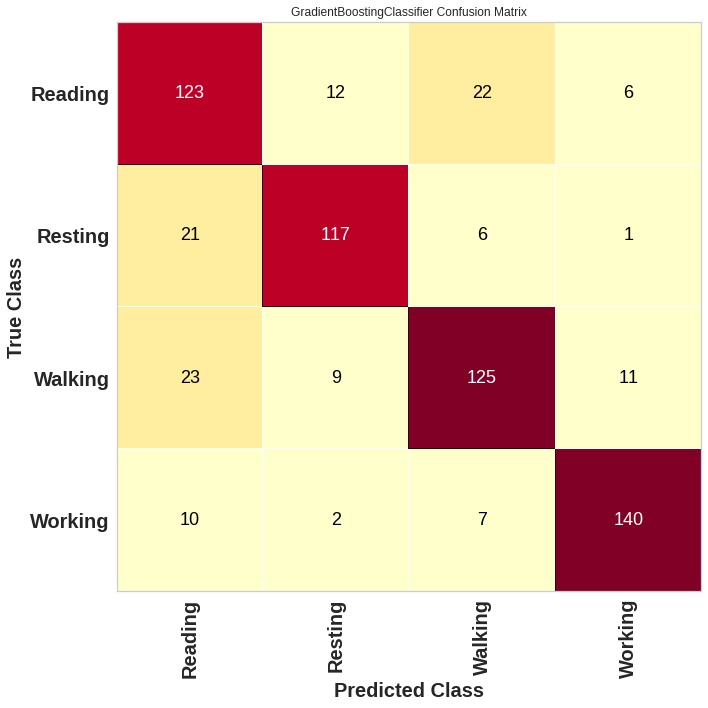

--------------------
--------------------


In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Testing"

}

Conf_Mat(X_test,y_test,attributes,new_keys_6)

#Confusion Matrix for Testing ( with Percent)

In [ ]:
def Conf_Mat_percent(X_,y_,attb,keys):

  import matplotlib.pyplot as plt
  from yellowbrick.classifier import ConfusionMatrix
  import matplotlib.dates as dates

  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)


  for i in range(len(keys)):
    if keys[i].value ==True:
      cm = ConfusionMatrix(models[i], classes=['Reading', 'Resting', 'Walking', 'Working'],fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax,percent=True)

      if str(models[i])[:3] == "XGB":
        cm.fit(X_train.values, y_train.values)
        cm.score(X_.values, y_.values)
      else:
        cm.fit(X_train, y_train)
        cm.score(X_, y_)
      
      cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
      cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
      cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
      cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
      for label in ax.get_xticklabels():
        label.set_fontweight(550)
      for label in ax.get_yticklabels():
        label.set_fontweight(550)
      
      plt.savefig(attb["type"]+"_Confusion_mat("+str(models[i])+").png")
      cm.show()
      print("--------------------")
      print("--------------------")

In [ ]:
new_keys_20=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=42, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=45, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, n_estimators=45, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=106, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=106, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=244, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, n_estimators=244, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names



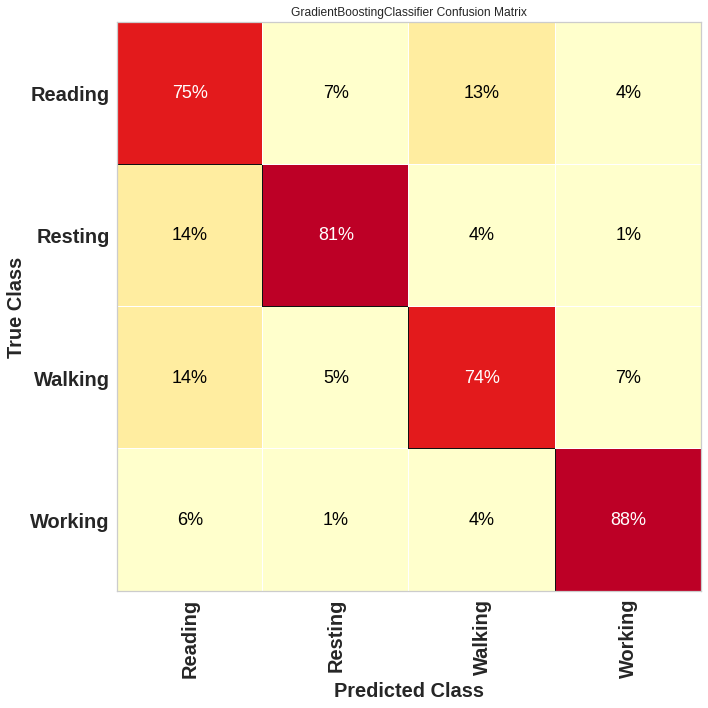

--------------------
--------------------


In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Training"

}

Conf_Mat_percent(X_test,y_test,attributes,new_keys_20)

#Confusion Matrix For Training

In [ ]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=42, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=45, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, n_estimators=45, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=106, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=106, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=244, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, n_estimators=244, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names


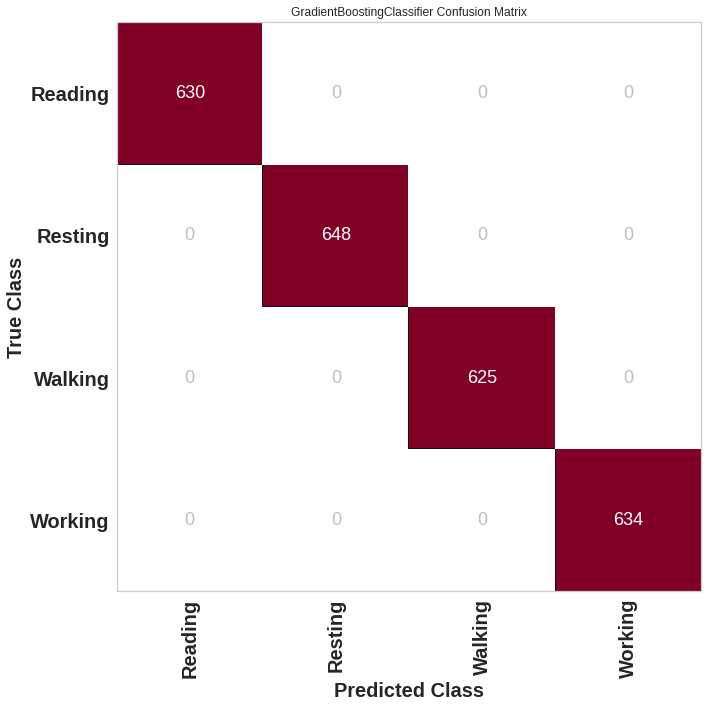

--------------------
--------------------


In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Training"

}

Conf_Mat(X_train,y_train,attributes,new_keys_5)

#Confusion Matrix for Training ( with Percent)

In [ ]:
new_keys_21=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=42, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=45, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, n_estimators=45, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=106, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=106, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=244, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, n_estimators=244, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names



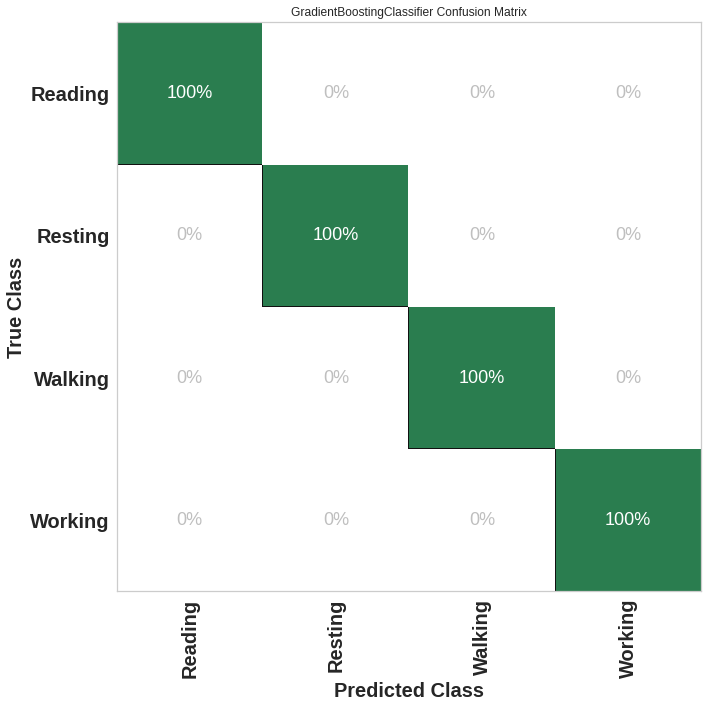

--------------------
--------------------


In [ ]:
attributes={
   "Fig Height": 10,
   "Fig weidth": 10, 
    
  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18,
  "type"  : "Training"

}

Conf_Mat_percent(X_train,y_train,attributes,new_keys_21)

#ROC FOR MULTICLASS

In [ ]:
!pip install plotly==5.11.0
!pip install -U kaleido


import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC(model,X,y,fig_name,graph_attributes):
    
    lebel_dict={
    0: 'Reading',
    1: 'Resting',
    2: 'Walking',
    3: 'Working'
    }
    if str(model)[:3] == "XGB":
      y_scores = model.predict_proba(X.values)
    else:
      y_scores = model.predict_proba(X)
    #y_scores = model.predict_proba(X)

    y_onehot = pd.get_dummies(y, columns=model.classes_)

    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash', width=5),        
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=1000, height=1000,
        font=dict(
            family="Arial Black, monospace",
            size=graph_attributes["Font Size"],
            color=graph_attributes["Font Color"]
        ),
        legend=dict(
            x=0.62,
            y=0.05,
            traceorder="reversed",
            title_font_family="Arial Black",
            font=dict(
                family="Arial Black, monospace",
                size=graph_attributes["Legend Font Size"],
                color=graph_attributes["Legend Font Color"]
            ),
            bgcolor=graph_attributes["Legend bgcolor"],
            bordercolor=graph_attributes["Legend bordercolor"],
            borderwidth=graph_attributes["Legend borderwidth"]
        ),
        #plot_bgcolor="",
    )
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', tickfont_family="Arial Black")
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black',tickfont_family="Arial Black")

    fig.show()
    fig.write_image(fig_name+".png")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 62.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00


In [ ]:
new_keys_9=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=42, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=45, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, n_estimators=45, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=106, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=106, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=244, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, n_estimators=244, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

#Change the attriutes for graph
graph_attributes={
    "Font Size"  : 25,
    "Font Color" : "black",
    "Legend Font Size"  : 25,
    "Legend Font Color" : "black",
    "Legend bgcolor"    : "LightSteelBlue",
    "Legend bordercolor": "White",
    "Legend borderwidth": 1

}



for i in range(len(new_keys_9)):
  if new_keys_9[i].value ==True:
    print(models[i])
    fig1=ploty_ROC(models[i],X_train,y_train,str(models[i]),graph_attributes)
    fig2=ploty_ROC(models[i],X_test,y_test,str(models[i]),graph_attributes)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

GradientBoostingClassifier(max_depth=9, random_state=0)


---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------


#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new, y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

AdaBoostClassifier(random_state=0)  -> Accuracy:  0.5055118110236221
AdaBoostClassifier(random_state=0)  -> AVG Accurecy After CV: 0.5227248565538141 (For 5 Fold)
--------------------------------------------------------------------------
AdaBoostClassifier(n_estimators=42, random_state=0)  -> Accuracy:  0.5417322834645669
AdaBoostClassifier(n_estimators=42, random_state=0)  -> AVG Accurecy After CV: 0.5116813631734519 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(random_state=0)  -> Accuracy:  0.7086614173228346
GradientBoostingClassifier(random_state=0)  -> AVG Accurecy After CV: 0.69549169129884 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(n_estimators=45, random_state=0)  -> Accuracy:  0.6771653543307087
GradientBoostingClassifier(n_estimators=45, random_state=0)  -> AVG Accurecy After CV: 0.6563943466057278 (For 5 Fold)
-------------------------

# **LIME**

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=5c18eb9218515ab3254062f7f316300bdde3889e57b99b64dc6e3428be2c1857
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:

  def LIME_EXP(model,row):
    import lime
    from lime import lime_tabular


    if str(model)[:3] == "XGB":

      """explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=list(list(X_new.columns)),                                         
        class_names=['Reading', 'Resting', 'Walking', 'Working']
        )
      
      exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 model.predict_proba,
                                 num_features=6,
                                 top_labels=2)"""
      print("Plz RUN XGboost cell....")
      return None



    else:
      explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=list(X_new.columns),
        class_names=['Reading', 'Resting', 'Walking', 'Working'],
        mode='classification'
        )

      exp = explainer.explain_instance(X_test.iloc[row],
                                      model.predict_proba,               
                                      num_features=6,
                                      top_labels=4)
    


    exp.show_in_notebook(show_table=True, show_all=True)



    import matplotlib.pyplot as plt
    with plt.style.context("ggplot"):
        exp.as_pyplot_figure()


    from IPython.display import HTML
    html_data = exp.as_html()
    HTML(data=html_data)

    exp.save_to_file(str(model)+".html")

In [ ]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME


new_keys_8=models_check_box(models)

Enter the index of row to explain: 30


Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=42, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=45, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=9, n_estimators=45, random_state=0)', …

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=106, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=18, n_estimators=106, random_state=0)', in…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=244, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=11, n_estimators=244, objective='multi:softprob')",…

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    print(models[i])
    LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

### LIME for XGboost

In [ ]:
row = 18  ## the index of row to be explained in LIME

import lime
from lime import lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=list(list(X_new.columns)),
                                                   class_names=['Reading', 'Resting', 'Walking', 'Working'])

####Default

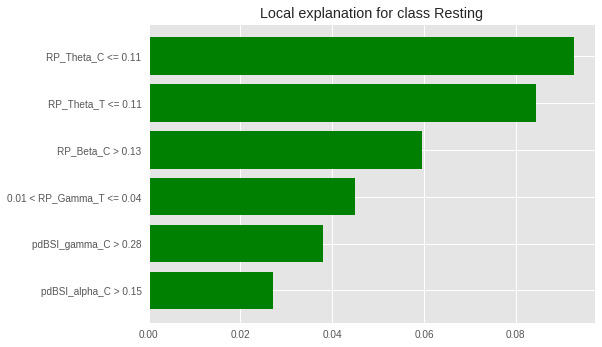

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_deafult.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_deafult)+".html")

####Best Max Depth

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_depth.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_depth)+".html")

####Best N Estimator

In [ ]:


exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_estimator.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)

import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_estimator)+".html")

####Best Depth and Best Estimator

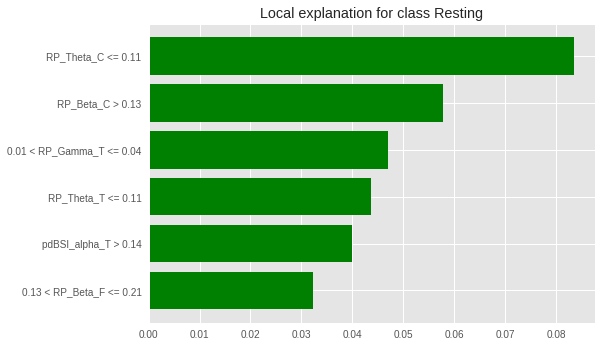

In [ ]:

exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 xgb_all.predict_proba,
                                 num_features=6,
                                 top_labels=4)

exp.show_in_notebook(show_table=True, show_all=False)


import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()


from IPython.display import HTML
html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(xgb_all)+".html")